In [1]:
# import necessary python packages
import numpy as np
import matplotlib.pyplot as plt
import functools

# make it so that plots will appear in-line in your notebook (i.e., next to the code)
%matplotlib inline 

The following cell defines the unit step function 
$$
u_c(t) = \begin{cases}
    0  \quad & 0 \leqslant t < c \, , \\
    1  & t \geqslant c \, .
\end{cases}
$$
that takes in both parameter $c$ and number $t$ as inputs.

In [2]:
def u(t,c):
    if 0 <= t < c: 
        return 0 # u_c(x) = 0
    else: # else, u_c(x) = 1
        return 1

Let's use this function to plot the function:
$$
f(t) =
\begin{cases}
0 \quad & 0 \leqslant t < 1 \\
\cos(t) & t \geqslant 1
\end{cases}
= u_1(t)\cos(t)
$$

In [18]:
def f(t):
    return u(t,1)*np.cos(t)

As with our previous example of plotting piecewise functions (`plot_piecewise.ipynb`), the way we defined `u(t,c)` is not "vectorized," so we have to use the Python function `map` to apply our function `f` to each point in our array. We will also use <i> array slicing </i> so that we don't plot the line of the graph at the jump discontinuity at $t=1$.

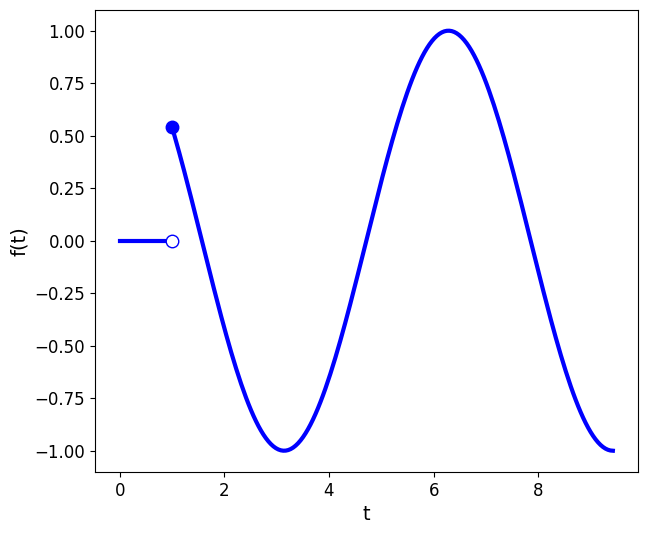

In [19]:
t= np.linspace(0,3*np.pi,200) # array of values of t: 200 points from t=0 to t=3*pi

plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(t[t<1],list(map(f,t[t<1])),'b-',linewidth=3) # plot f for values of t < 1
plt.plot(t[t>=1],list(map(f,t[t>=1])),'b-',linewidth=3) # plot f for values of t >= 1

plt.plot(1,0,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (1,0)
plt.plot(1,np.cos(1),ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (1,cos(1))

plt.xlabel('t',fontsize=14) # label x axis
plt.ylabel('f(t)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

How about the function:
Let's use this function to plot the function:
$$
f(t) =
\begin{cases}
2 \quad & 0 \leqslant t < 4 \\
2 + e^{-t} & t \geqslant 4
\end{cases}
= 2 + u_4(t)e^{-t} \qquad ?
$$


In [20]:
def f(t):
    return 2+u(t,4)*np.exp(-t)

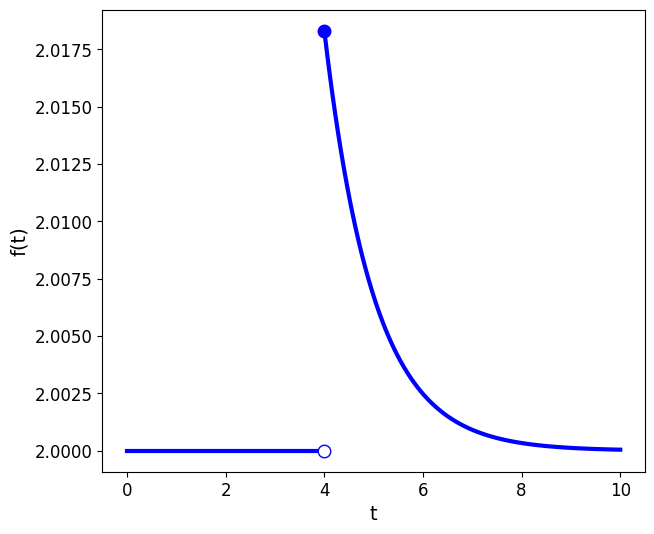

In [21]:
t= np.linspace(0,10,200) # array of values of t: 200 points from t=0 to t=10

plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(t[t<4],list(map(f,t[t<4])),'b-',linewidth=3) # plot f for values of t < 4
plt.plot(t[t>=4],list(map(f,t[t>=4])),'b-',linewidth=3) # plot f for values of t >= 4

plt.plot(4,2,ls='',marker='o',ms=9,markerfacecolor='white',markeredgecolor='blue') # plot open circle at point (4,2)
plt.plot(4,2+np.exp(-4),ls='',marker='o',ms=9,markerfacecolor='blue',markeredgecolor='blue') # plot closed circle at point (4,f(4))

plt.xlabel('t',fontsize=14) # label x axis
plt.ylabel('f(t)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

On Homework 6, you are asked to solve a non-homogeneous ODE with forcing function
$$
f_n(t) = 1 + 2 \sum_{k=1}^n (-1)^k u_{k\pi}(t)
$$
The following cell defines this function numerically, taking in both a positive integer $n$ and number $t$ as inputs. In particular, it uses a `for` loop to evaluate a running sum from $k=1$ to $k = n$.

In [8]:
def f_n(t,n):
    fn = 1 # first term in the sum is 1
    for k in range(1,n+1): # for k = 1, 2, ..., n
        fn += 2*((-1)**k)*u(t,k*np.pi) # add 2(-1)^k * u_{k*pi}(t) to running sum
    return fn

Let's plot $f_{2}$, $f_{5}$, and $f_{10}$ over the range $0 \leqslant t \leqslant 8\pi$. Once again, we have to use Python's `map` function to apply `f_n` to each point in our array. Because `f_n` takes in two inputs `t` and `n`, we have to use `functools.partial` to define a version of `f_n` in-line that only takes in `t` as an input for a specified value of `n`.

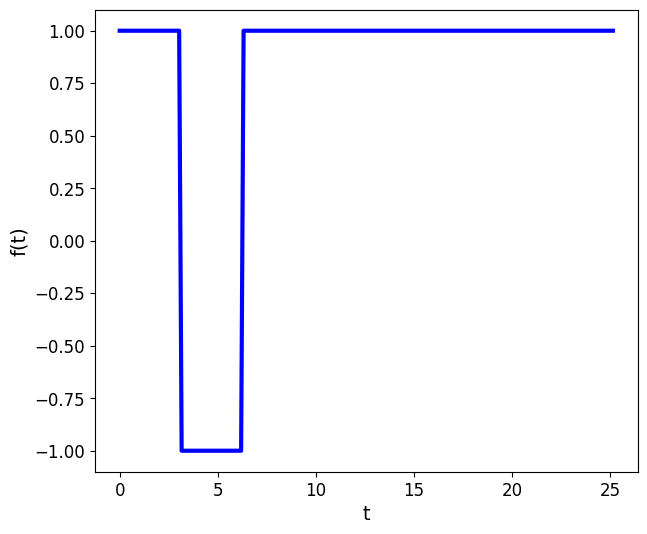

In [18]:
t = np.linspace(0,8*np.pi,200) # array of values of t: 200 points from t=0 to t=8pi
N=2 # change this value to change the value of n in f_n
f_N = list(map(functools.partial(f_n,n=N),t)) # array of outputs: value of f_N at each point in array t

plt.figure(figsize=(7,6)) # set the dimensions of your figure

plt.plot(t,f_N,'b-',linewidth=3) # plot function

plt.xlabel('t',fontsize=14) # label x axis
plt.ylabel('f(t)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('square_wave_N'+str(N)+'.png',dpi=400) # save your figure as a png with resolution 400 dpi

You may adapt this code for the plots you are asked to include in Homework 6.

In [4]:
def h(t):
    return 0.5 - 0.5*np.exp(-t/4)*(np.cos(np.sqrt(15/16)*t)+(1/np.sqrt(15))*np.sin(np.sqrt(15/16)*t))

def y(t):
    return u(t,5)*h(t-5) - u(t,20)*h(t-20)

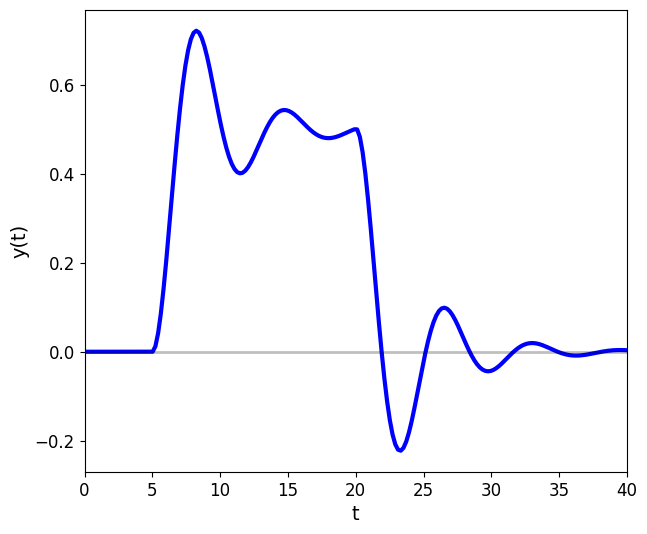

In [11]:
t= np.linspace(0,40,200) # array of values of t: 200 points from t=0 to t=10

plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(t,list(map(y,t)),'b-',linewidth=3) # plot f for values of t < 4
plt.plot([-3,43],[0,0],'k-',linewidth=2,alpha=0.25) # plot f for values of t < 4

plt.xlim([0,40])
plt.xlabel('t',fontsize=14) # label x axis
plt.ylabel('y(t)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('lect17_1.png',dpi=400) # save your figure as a png with resolution 400 dpi

In [12]:
def h(t):
    return 0.25*t - (1/8)*np.sin(2*t)

def y(t):
    return (u(t,5)*h(t-5) - u(t,10)*h(t-10))/5

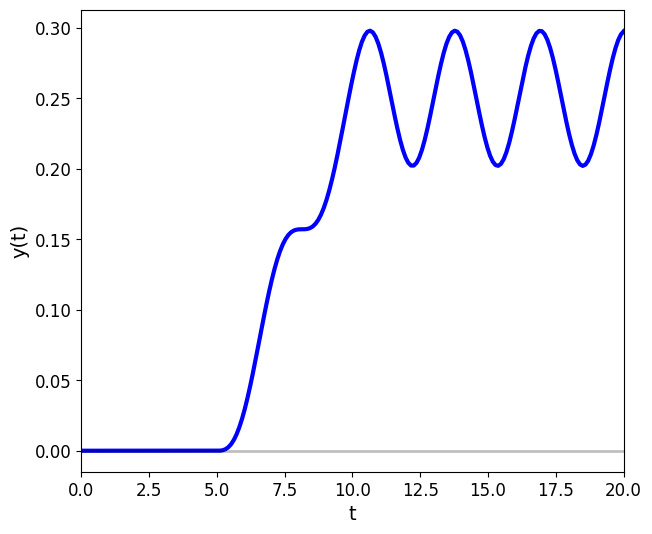

In [13]:
t= np.linspace(0,20,200) # array of values of t: 200 points from t=0 to t=10

plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(t,list(map(y,t)),'b-',linewidth=3) # plot f for values of t < 4
plt.plot([-3,23],[0,0],'k-',linewidth=2,alpha=0.25) # plot f for values of t < 4

plt.xlim([0,20])
plt.xlabel('t',fontsize=14) # label x axis
plt.ylabel('y(t)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('lect17_2.png',dpi=400) # save your figure as a png with resolution 400 dpi

In [6]:
def h(t):
    return (4/np.sqrt(15))*np.exp(-t/4)*np.sin((np.sqrt(15)/4)*t)

def y(t):
    return 0.5*u(t,5)*h(t-5)

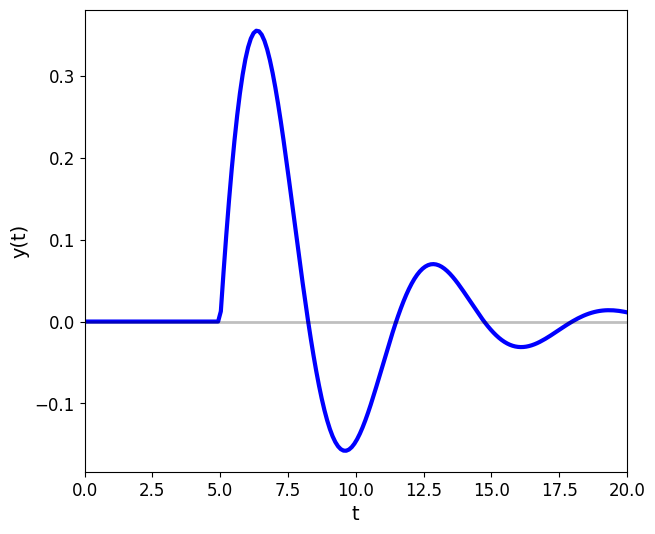

In [7]:
t= np.linspace(0,20,200) # array of values of t: 200 points from t=0 to t=10

plt.figure(figsize=(7,6)) # set the dimensions of your figures

plt.plot(t,list(map(y,t)),'b-',linewidth=3) # plot f for values of t < 4
plt.plot([-3,23],[0,0],'k-',linewidth=2,alpha=0.25) # plot f for values of t < 4

plt.xlim([0,20])
plt.xlabel('t',fontsize=14) # label x axis
plt.ylabel('y(t)',fontsize=14) # label y axis
plt.xticks(fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('lect18.png',dpi=400) # save your figure as a png with resolution 400 dpi

In [4]:
def y_n(t,n):
    yn = 1 - np.cos(t) # first term in the sum 
    for k in range(1,n+1): # for k = 1, 2, ..., n
        yn += 2*((-1)**k)*u(t,11*k/4)*(1-np.cos(t-11*k/4)) # add to running sum
    return yn

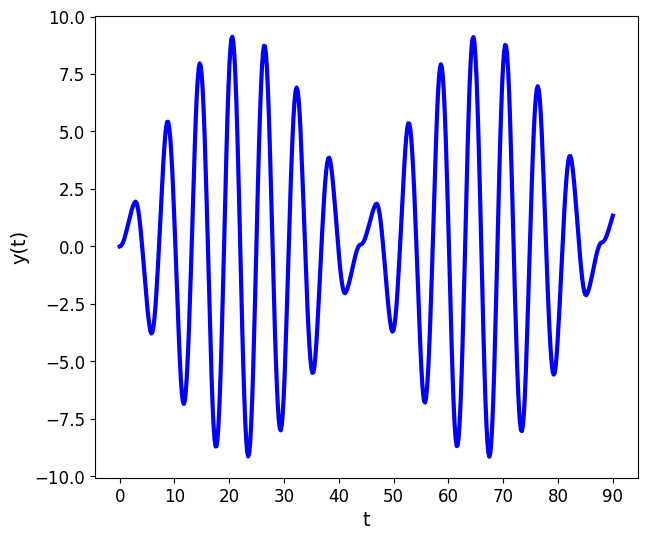

In [8]:
t = np.linspace(0,90,500) 
N=40 # change this value to change the value of n in y_n
y_N = list(map(functools.partial(y_n,n=N),t)) # array of outputs: value of f_N at each point in array t

plt.figure(figsize=(7,6)) # set the dimensions of your figure

plt.plot(t,y_N,'b-',linewidth=3) # plot function

plt.xlabel('t',fontsize=14) # label x axis
plt.ylabel('y(t)',fontsize=14) # label y axis
plt.xticks(np.linspace(0,90,10),fontsize=12); # set fontsize for markers on x axis
plt.yticks(fontsize=12); # set fontsize for markers on y axis

plt.savefig('square_wave2_N'+str(N)+'.png',dpi=400) # save your figure as a png with resolution 400 dpi